In [1]:
import json
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
from interaction_inference import simulation
from interaction_inference.constraints import Constraint
from interaction_inference.optimization import Optimization

In [2]:
rng = np.random.default_rng(1)

In [3]:
# simulate sample
data = simulation.simulate_dataset_range_BD(
    name = "test",
    interaction_values = [0], # [50, 20, 10, 8, 6, 4, 2, 1, 0.5, 0], #[5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0],
    cells = 1000,
    rate = 1,
    tqdm_disable = False
)

100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


In [17]:
# downsample
m = 0.99
b = (1 / m) - 1
beta = rng.beta(1, b, size=1000)
data_downsampled = data.downsample("test", beta)

In [25]:
data_downsampled.thresh_OG = 10 ** -6
data_downsampled.thresh_OB = 20

100%|██████████| 1/1 [00:00<00:00, 49.34it/s]


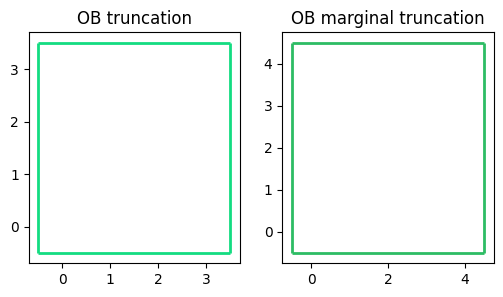

100%|██████████| 16/16 [00:00<00:00, 317.90it/s]


In [26]:
# bootstrap
data_downsampled.compute_probabilities(display=True, tqdm_disable=False)

In [27]:
data_downsampled.truncation_OG

{0: (0, 83), 1: (1, 110), 2: (2, 134), 3: (3, 156), 4: (4, 176)}

In [28]:
# construct constraints
constraints = Constraint(
    marginal_probability_1 = True,
    marginal_probability_2 = True,
    marginal_CME_1 = True,
    marginal_CME_2 = True,
    k_deg_1 = True,
    k_deg_2 = True
)

# optimize
opt = Optimization(data_downsampled, constraints, tqdm_disable=True, print_solution=True)

Optimization status: OPTIMAL
Runtime: 0.7170000076293945


In [29]:
# construct constraints
constraints = Constraint(
    joint_probability = True
)

# optimize
opt = Optimization(data_downsampled, constraints, tqdm_disable=True, print_solution=True, silent=False, compute_IIS=True)

Set parameter Username
Set parameter LicenseID to value 2616229
Academic license - for non-commercial use only - expires 2026-01-29
Set parameter TimeLimit to value 300
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  300

Optimize a model with 3849 rows, 31329 columns and 493901 nonzeros
Model fingerprint: 0x51b20ee1
Coefficient statistics:
  Matrix range     [1e-09, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+00]
Presolve removed 2506 rows and 8814 columns
Presolve time: 0.05s

Solved in 0 iterations and 0.05 seconds (0.03 work units)
Infeasible model
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, ins

In [10]:
bounds = data_downsampled.probs_OB['sample-0']['bounds']
bounds[1, :, :] - bounds[0, :, :]

array([[0.042025, 0.043025, 0.029   , 0.018   , 1.      , 1.      ],
       [0.045025, 0.04105 , 0.032   , 0.016   , 1.      , 1.      ],
       [0.029   , 0.03    , 0.026   , 1.      , 1.      , 1.      ],
       [0.017   , 0.018   , 1.      , 1.      , 1.      , 1.      ],
       [1.      , 1.      , 1.      , 1.      , 1.      , 1.      ],
       [1.      , 1.      , 1.      , 1.      , 1.      , 1.      ]])

Truncation sig smaller for -2 than -6 (even -3 gets fiarly large)

Epsilon doesnt change indep BD results

Int BD infeasible for -2, -3, etc and still very slow